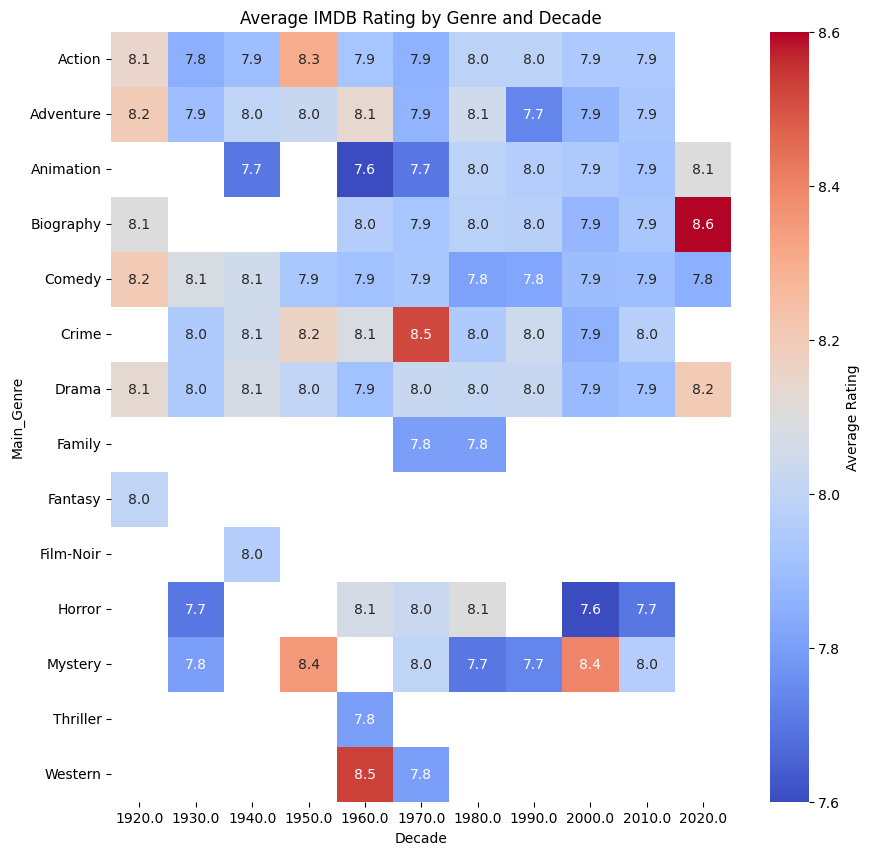

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Our Datasets/imdb_top_1000.csv')
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Main_Genre'] = df['Genre'].apply(lambda x: x.split(',')[0])
df['Decade'] = (df['Released_Year'] // 10)*10

pivot = pd.pivot_table(
    df,
    values='IMDB_Rating',
    index='Main_Genre',
    columns='Decade',
    aggfunc='mean'
)

plt.figure(figsize = (10,10))
sns.heatmap(pivot,annot=True,fmt='.1f',cmap='coolwarm',cbar_kws={'label':'Average Rating'})
plt.title('Average IMDB Rating by Genre and Decade')
plt.savefig('Our Datasets/imdb_genre_decade_heatmap.png')
plt.show()